# Display Confusion Matrices of BioMedParse Experiments
- results given in master thesis

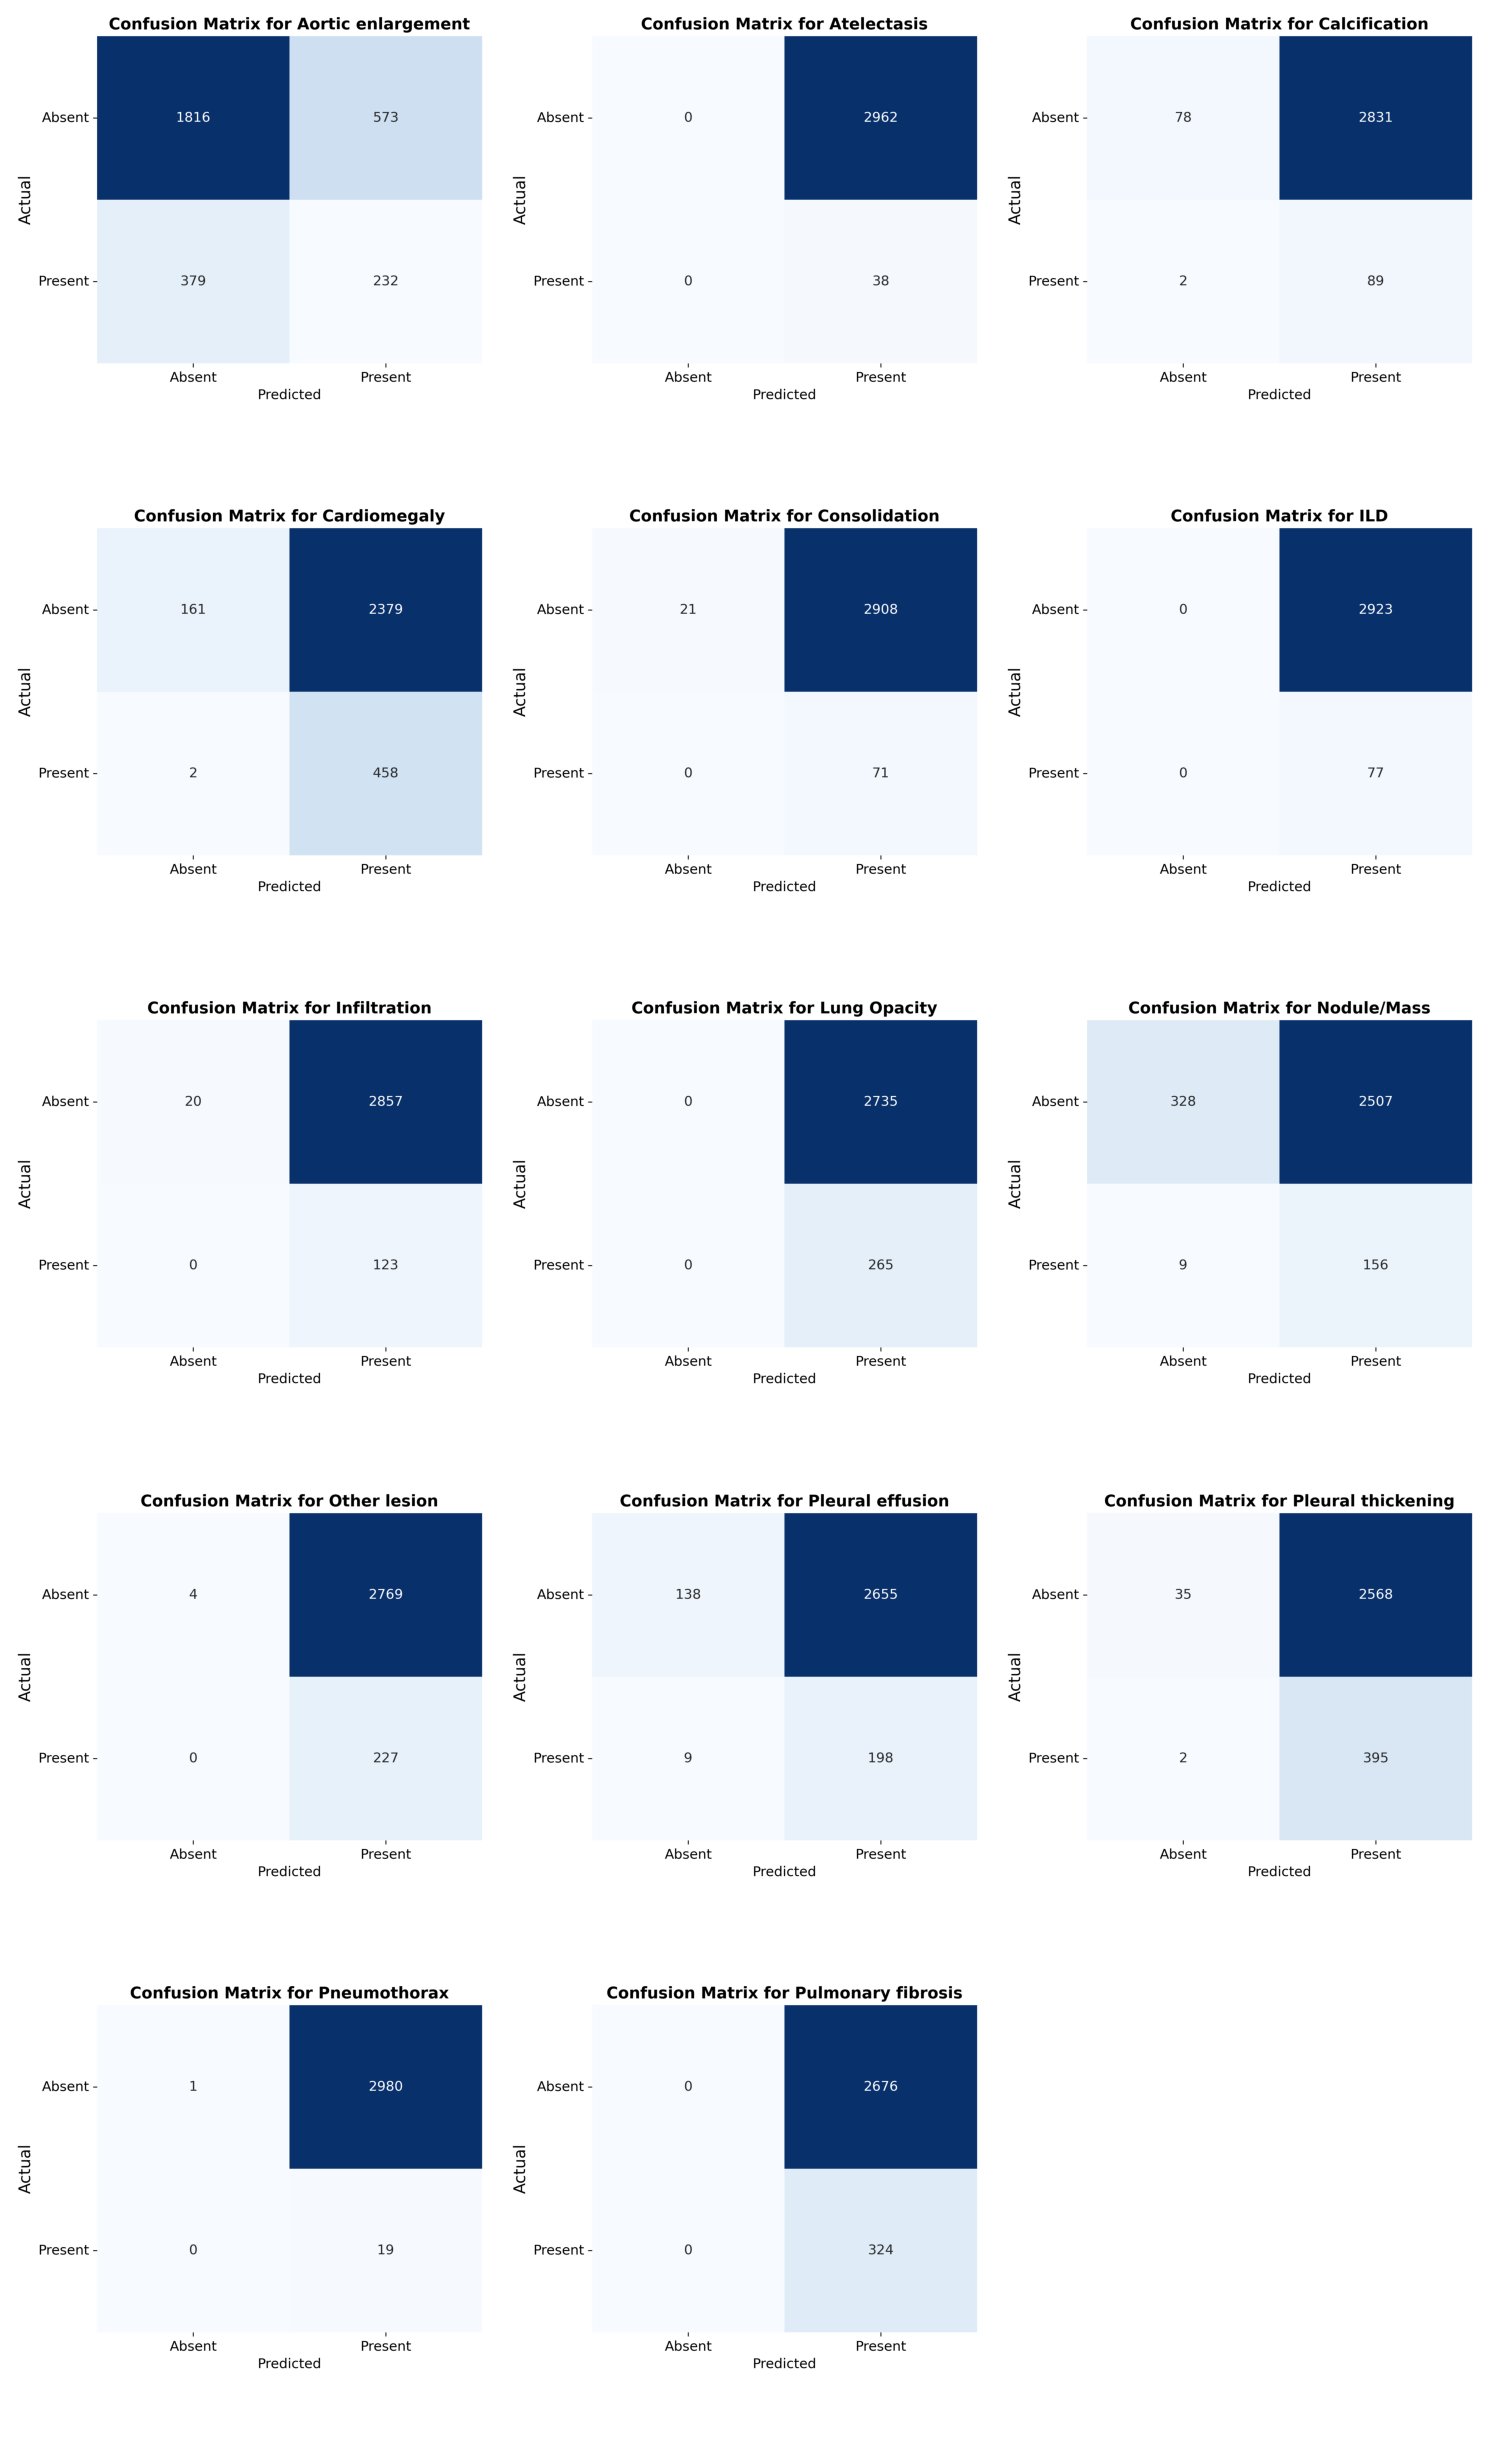

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = r'C:\Users\Admin\Downloads\BioMedParse'

image_files = sorted([f for f in os.listdir(folder_path) if f.startswith('confusion_matrix_')])[:14]

images = [Image.open(os.path.join(folder_path, f)) for f in image_files]

cols = 3
rows = (len(images) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for idx, ax in enumerate(axes.flat):
    if idx < len(images):
        ax.imshow(images[idx])
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

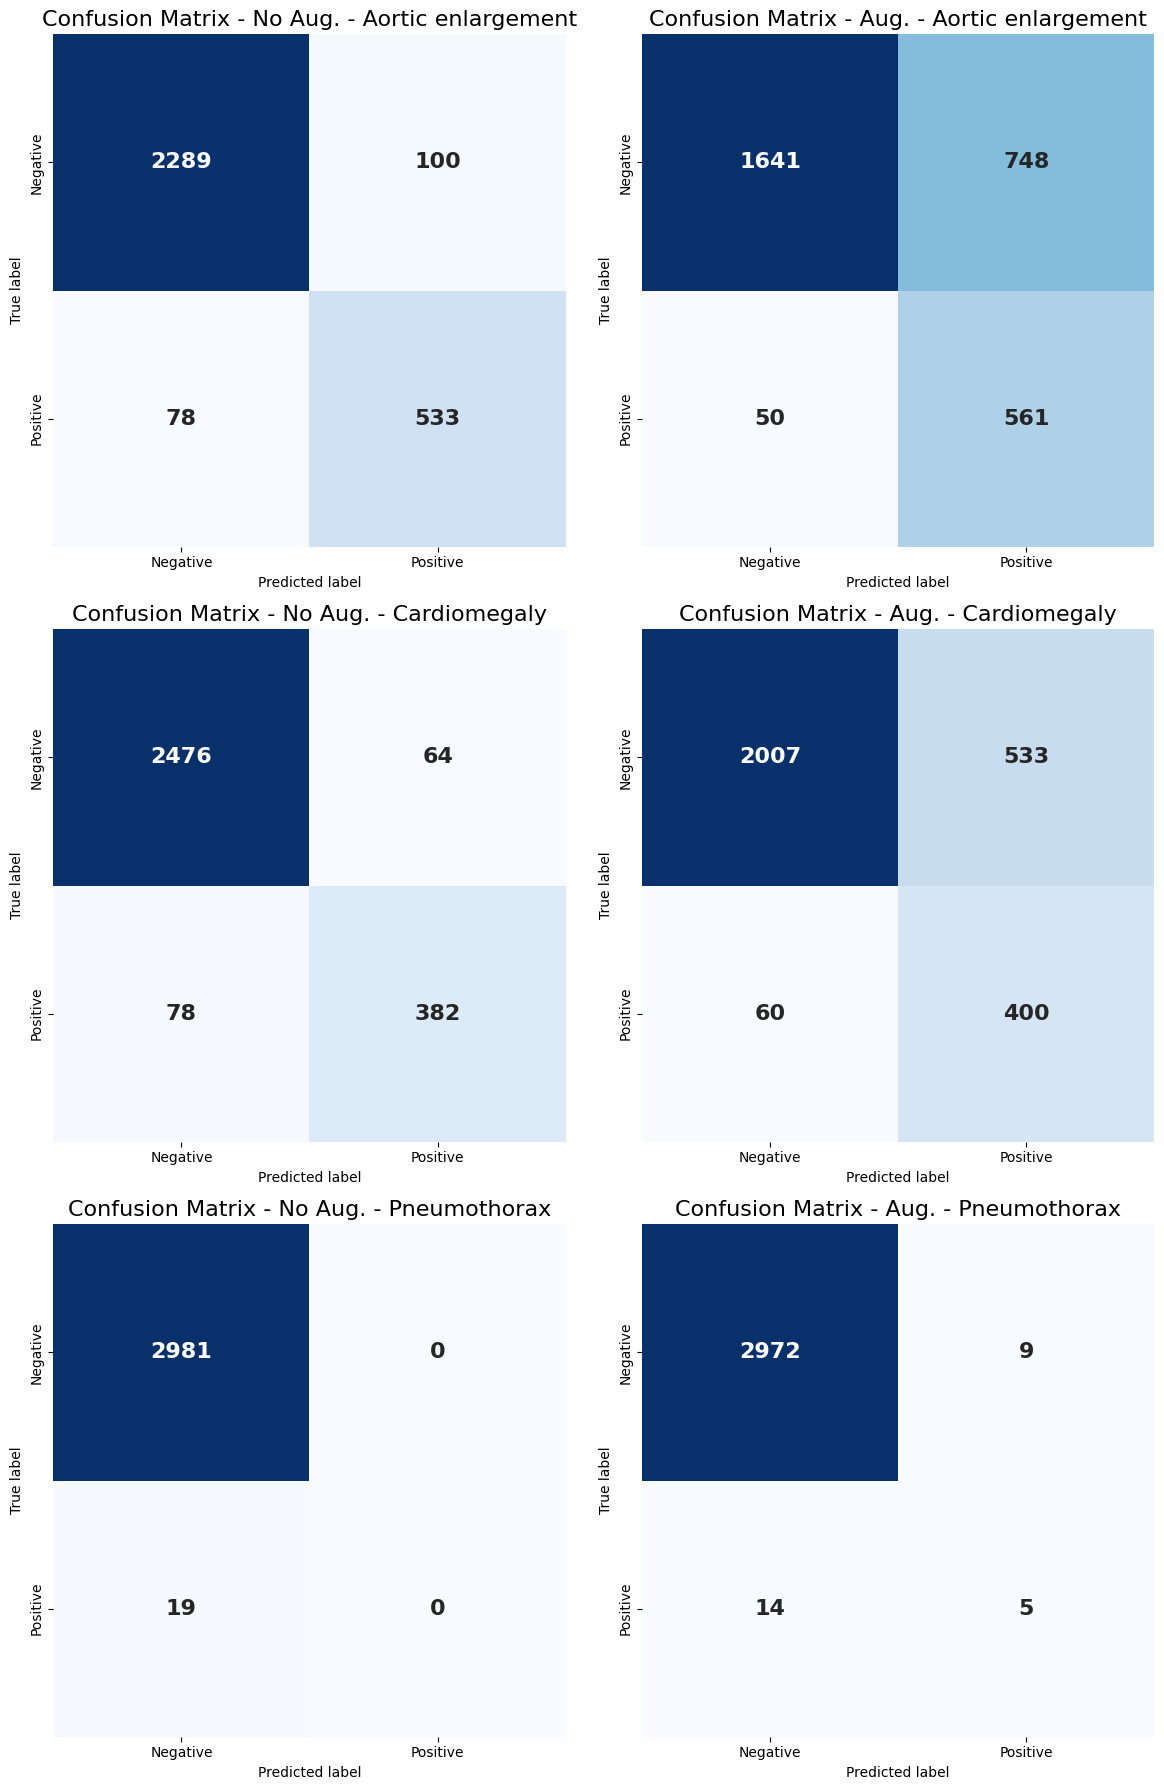

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

# Load JSON Files
with open(r"C:\Users\Admin\Documents\MasterThesis\results\VinBigData\ResNet_Baseline\no_nosamp\seed_0\confusion_matrix\confusion_matrix_best_f1_1.json", 'r') as f1:
    json_data_1 = json.load(f1)
with open(r"C:\Users\Admin\Documents\MasterThesis\results\VinBigData\ResNet_Baseline\light_oversamp\seed_1\confusion_matrix\confusion_matrix_best_f1_1.json", 'r') as f2:
    json_data_2 = json.load(f2)


indices = [0, 3, 12]

class_names = ["Aortic enlargement", "Atelectasis", "Calcification", "Cardiomegaly",
    "Consolidation", "ILD", "Infiltration", "Lung Opacity",
    "Nodule/Mass", "Other lesion", "Pleural effusion", "Pleural thickening",
    "Pneumothorax", "Pulmonary fibrosis"]

# Extract confusion matrices from both files and then compute them with plot_confusion_matrix function
cms_1 = [json_data_1['confusion_matrices'][i] for i in indices]
cms_2 = [json_data_2['confusion_matrices'][i] for i in indices]

def plot_confusion_matrix(cm, title, ax):
    cm_array = np.array(cm)
    sns.heatmap(cm_array, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, square=True, annot_kws={"size": 16, "weight": 'bold'})
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title, fontsize=16)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Plot side-by-side comparisons
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for i in range(3):
    plot_confusion_matrix(cms_1[i], f'Confusion Matrix - No Aug. - {class_names[indices[i]]}', axes[i, 0])
    plot_confusion_matrix(cms_2[i], f'Confusion Matrix - Aug. - {class_names[indices[i]]}', axes[i, 1])

plt.tight_layout()
plt.show()
